In [1]:
import numpy as np 
import torch
import matplotlib.pyplot as plt
from generate_samples_functions import kill_processes

In [43]:
# list of GPU IDs and corresponding names
# list of GPU IDs and corresponding names
GTX_TITAN_X = [f'0{i}' for i in range(1,10)] + ['10', '11', '12', '13']
RTX_2080_ti = ['18', '19', '20', '21', '22', '28', '29', '30',]
GTX_1080 = ['15', '14', '16', '17', '23', '24']

gpu_ids = GTX_TITAN_X + RTX_2080_ti + GTX_1080

ray_machines = ([f'ray0{i}' for i in range(1, 4)]
                + [f'ray0{i}' for i in range(6, 10)]
                + [f'ray{i}' for i in range(10, 27)])

gpu_names = ray_machines + ['gpu'+n for n in gpu_ids]
gpu_names

# for gpu_name in gpu_names:
#     kill_processes(gpu_name)

ssh: connect to host gpu18 port 22: No route to host


In [37]:
fids

array([8.59676374, 8.48922638, 8.59240606, 8.67282512, 8.51509704,
       8.55993167, 8.40710546, 0.        , 0.        , 0.        ])

In [42]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/fid_size_experiment_4000_var.npz')
fids = data['fid_trails']
fids[fids!=0].mean()
significant_improvement = fids[fids!=0].mean() - 2*fids[fids!=0].std()
significant_worsening = fids[fids!=0].mean() + 2*fids[fids!=0].std()
print(f'Mean: {fids[fids!=0].mean()}')
print(f'Std: {fids[fids!=0].std()}')
print(f'Critical values (p=0.02): ({significant_worsening.round(3)}, {significant_improvement.round(3)})')

Mean: 8.51258562276252
Std: 0.09234723365523126
Critical values (p=0.02): (8.697, 8.328)


In [19]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_10000_a.npz')
batch_0 = data['images']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_10000_a.npz')
batch_1 = data['images']
all_samples_20000 = np.concatenate((batch_0, batch_1), )

<function numpy.savez(file, *args, **kwds)>

In [20]:
np.concatenate((batch_0, batch_1), ).shape

(20000, 3, 32, 32)

ssh: connect to host ray20 port 22: No route to host


In [21]:
#@title Visualization code

def image_grid(x):
  size = 32
  channels = 3
  img = x.reshape(-1, size, size, channels)
  w = int(np.sqrt(img.shape[0]))
  img = img.reshape((w, w, size, size, channels)).transpose((0, 2, 1, 3, 4)).reshape((w * size, w * size, channels))
  return img

def show_samples(x, s=10):
  x = x.permute(0, 2, 3, 1).detach().cpu().numpy()
  img = image_grid(x)
  plt.figure(figsize=(s,s))
  plt.axis('off')
  plt.imshow(img)
  plt.show()


In [22]:
def good_images(loaded_data, key='x'):
    '''Check if the data generation has failed on this GPU'''
    images = loaded_data['x']
    if images.reshape(-1).std()<0.2:
        return False
    else:
        return True

In [24]:
images.shape

NameError: name 'images' is not defined

In [25]:
5*64

320

In [ ]:
gpu_ids = ['19', '20', '21', '28', '29', '23', '02', '16', '08']
# gpu_ids = ['23']
gpu_names = ['gpu'+n for n in gpu_ids]

data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/' + gpu_ids[0] + '_samples.npz')
all_images = data['x']
print(gpu_ids[0])
show_samples(torch.tensor(all_images),3)

for number in gpu_ids[1:]:
    path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/' + number + '_samples.npz'
    print(number)
    data = np.load(path)
    images = data['x']
    print(images.reshape(-1).std())
    show_samples(torch.tensor(images) ,3)
    all_images = np.concatenate((all_images, images), 0)


In [19]:
np.sqrt(10000)

100.0

In [25]:
sorted_indices = np.argsort(all_images[:, 0, 0, 0])

array([5762,  968, 5974, ..., 4001, 5824, 2919])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


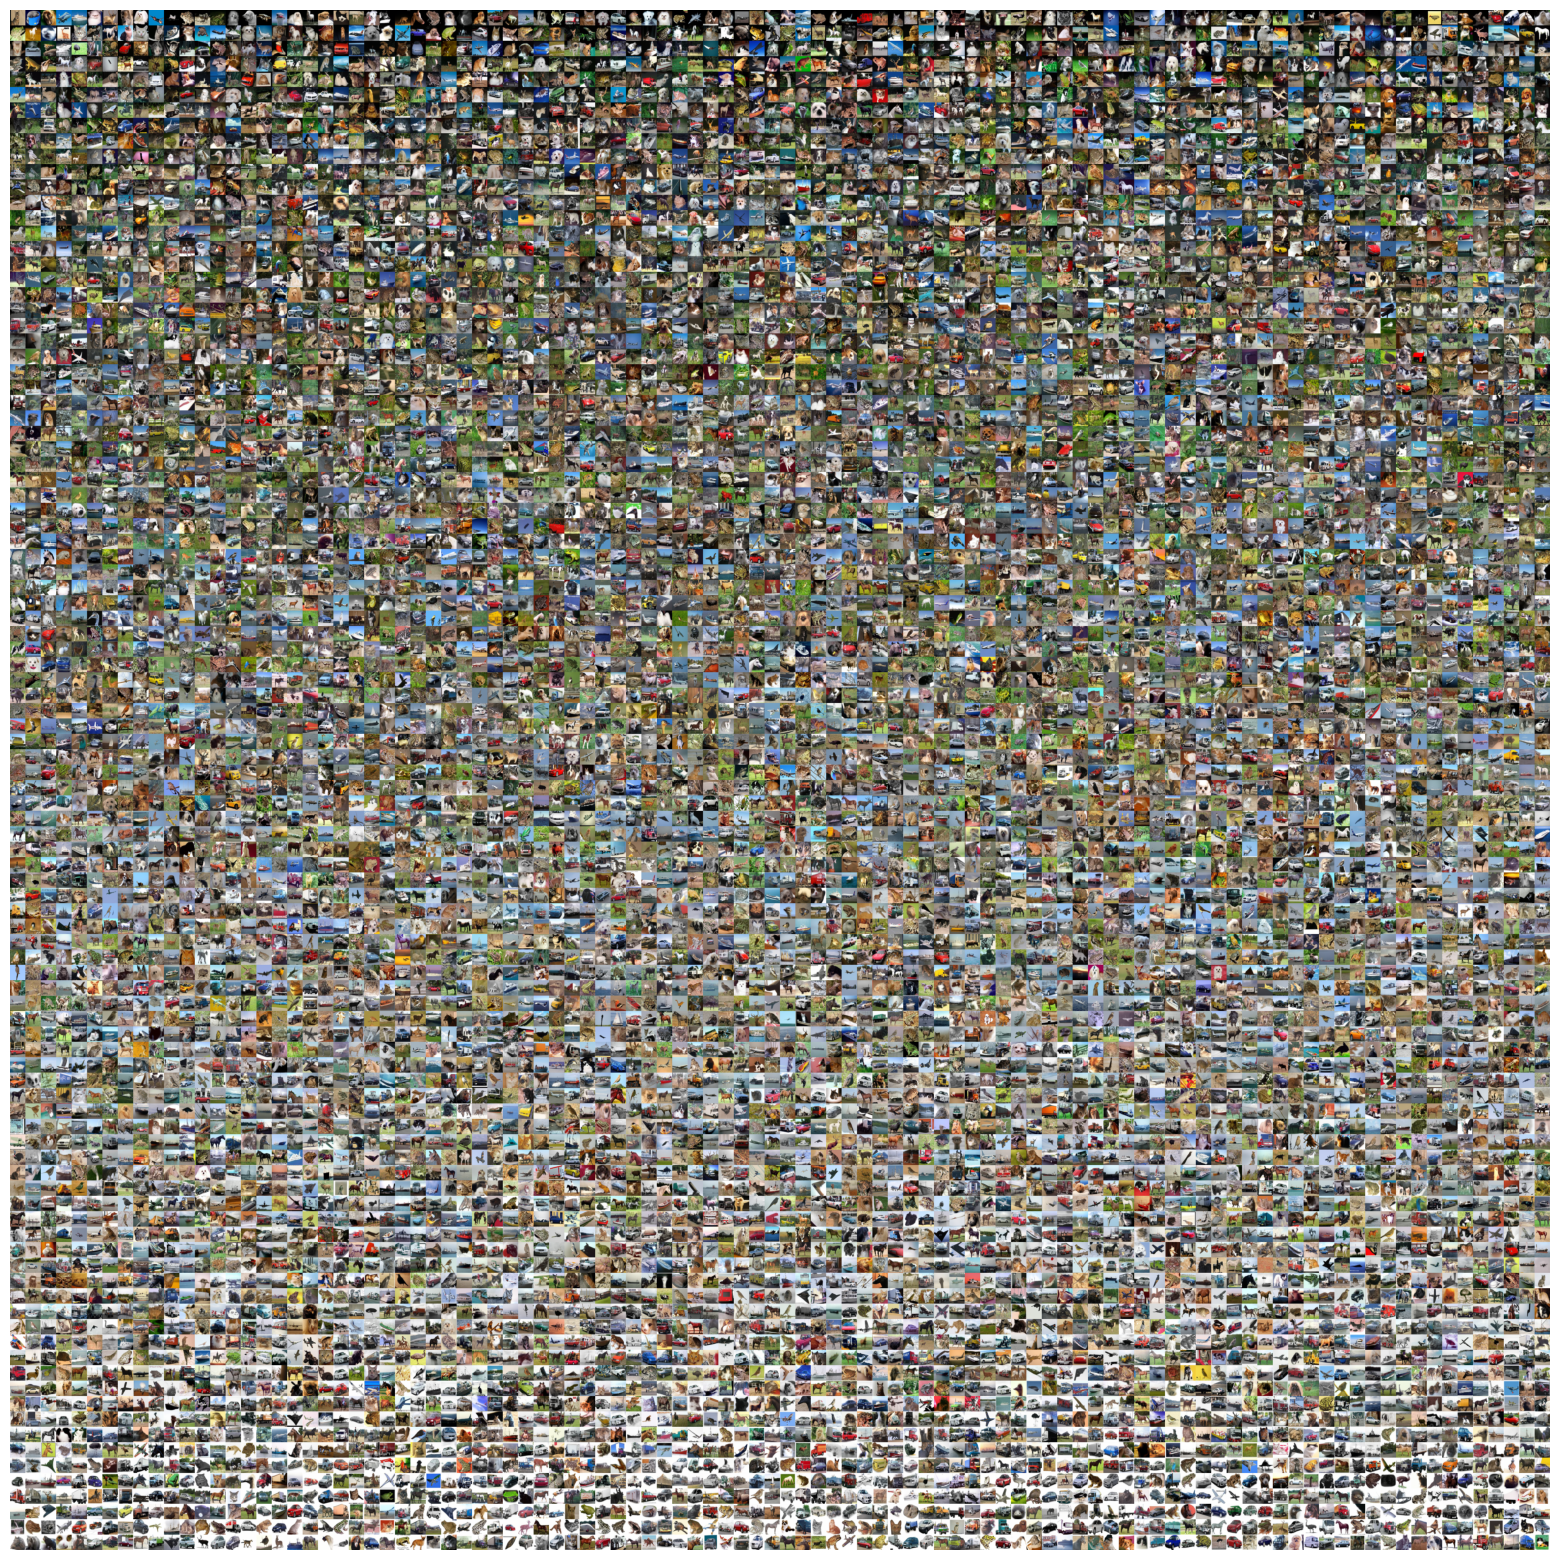

In [26]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_10000_a.npz')
all_images = data['images']
sorted_indices = np.argsort(all_images[:, 0, 0, 0])
show_samples(torch.tensor(
    all_images[sorted_indices][:int(np.sqrt(all_images.shape[0]))**2, :, :, :]
    ), 20)

In [59]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                        'samples/cirfar10_true_4000.npz')
data_samples = data['images']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/'
                                'all_samples_400.npz')
gen_samples = data['x']
print(gen_samples.shape)
print(data_samples.transpose(0,3,1,2).shape)

(400, 3, 32, 32)
(4000, 3, 32, 32)


In [57]:
data_samples.transpose(0,3,1,2).shape
# data_samples.shape

(4000, 3, 32, 32)

In [61]:
data_samples.max()

255

In [63]:
gen_samples.max()

1.042978286743164

In [67]:
import numpy as np

# Load data_samples
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cirfar10_true_4000.npz')
data_samples = data['images'].transpose(0, 3, 1, 2)

# Load gen_samples
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_400.npz')
gen_samples = data['x']


In [70]:
gen_samples.shape

(400, 3, 32, 32)

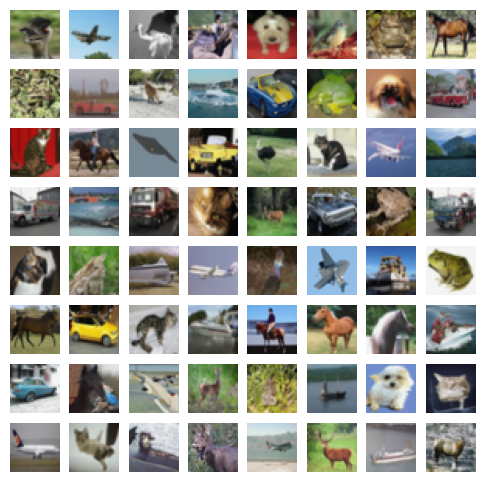

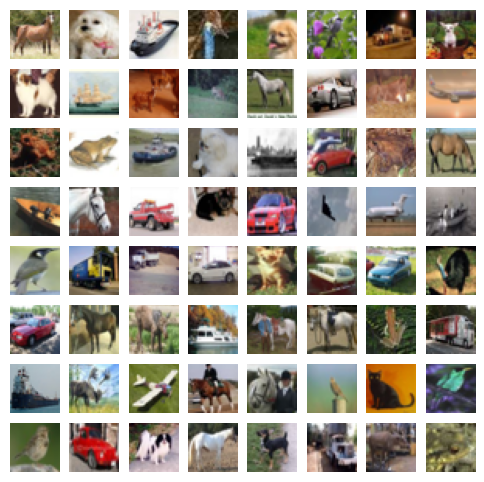

In [73]:
import matplotlib.pyplot as plt

def plot_images(image_array):
    fig, axs = plt.subplots(8, 8, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        # numpy transpose to reshape the image to (32, 32, 3)
        img = np.transpose(image_array[i], (1, 2, 0))
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Assuming img_array_1 and img_array_2 are your image arrays

plot_images(gen_samples)
plot_images(data_samples)
